**RQ2: How does SLIM_GSGP behave in terms of performance and model size compared to standard GP and traditional GSGP?**

Experimental Setup:

10 (will be 30 for the final version) Monte Carlo Runs for 18 Datasets with the fixed configurations:


config_all = {

    'pop_size': 100, #will be 200 for final version
    'n_iter': 500,  #will be 2000 for final version
    'elitism': True,
    'n_elites': 1,
    'init_depth': 6,
    'initializer': 'rhh',
    'tournament_size': 2,
    'prob_const': 0.2,
    'tree_functions': ['add', 'subtract', 'multiply', 'divide'],
    'tree_constants': np.linspace(-10, 10, num=201).round(1).tolist(),
    'fitness_function': sigmoid_rmse,
    'minimization' : True,
    'seed': None, #based on monte_carlo_run
    'log_path' : None, #based on monte_carlo_run
    'verbose': False,
    'log_level': 0,
    'test_elite': True

}

basic_config_gp = {

    'p_xo': 0.8,
    'max_depth': 17

}

basic_config_gsgp = {

    'p_xo': 0,
    'ms_lower': 0,
    'ms_upper': 1,
    'reconstruct' : True

}

basic_config_slim= {

    'slim_version': None, #for all versions
    'ms_lower': 0,
    'ms_upper': 1,
    'p_inflate': 0.5,
    'reconstruct': True,
    'copy_parent': True

}









In [40]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *
import warnings
warnings.filterwarnings("ignore")
settings_dict = {'': 'name'}
ana = Analysis('comparison', settings_dict)

In [41]:
ana_f = Analysis('fitness', settings_dict)
best_f = pd.read_csv('../RQ_Fitness/best_configs.csv')
ana_f.results = pd.merge(ana_f.results, best_f, how='inner', on=['dataset_name','config_id']).sort_values(by=['dataset_name', 'config_id'])
ana_f.logs = pd.merge(ana_f.logs, best_f, how='inner', left_on=['dataset', 'config_id'], right_on=['dataset_name', 'config_id']).sort_values(by=['dataset_name', 'config_id'])

In [42]:
ana_i = Analysis('inflationrate', settings_dict)
best_i = pd.read_csv('../RQ_Inflationrate/best_configs.csv')
ana_i.results = pd.merge(ana_i.results, best_i, how='inner', on=['dataset_name','config_id']).sort_values(by=['dataset_name', 'config_id'])
ana_i.logs = pd.merge(ana_i.logs, best_i, how='inner', left_on=['dataset', 'config_id'], right_on=['dataset_name', 'config_id']).sort_values(by=['dataset_name', 'config_id'])

In [43]:
ana.results = pd.concat([ana_f.results, ana_i.results, ana.results], axis=0).sort_values(by=['dataset_name', 'config_id'])
ana.logs = pd.concat([ana_f.logs, ana_i.logs, ana.logs], axis=0).sort_values(by=['dataset_name', 'config_id'])

In [44]:
ana.results[['dataset_name','config_id']].value_counts()

dataset_name  config_id
auction       3            8
              28           8
heart         35           8
              49           8
pc4           3            8
              23           8
              42           8
              49           8
thyroid       4            8
              20           8
              39           8
              49           8
wilt          4            8
              32           8
              44           8
              49           8
wisconsin     2            8
              19           8
              35           8
heart         24           8
              1            8
darwin        49           8
biomed        19           8
auction       43           8
              49           8
autism        4            8
              24           8
              38           8
              49           8
biomed        1            8
              35           8
darwin        35           8
biomed        49           8
credit        1    

Visualization of the Train and Test Error (RMSE) Evolution. 


<span style="color:#050505;">&#9632; GP</span>
<span style="color:#7a7a7a;">&#9632; GSGP</span>
<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>


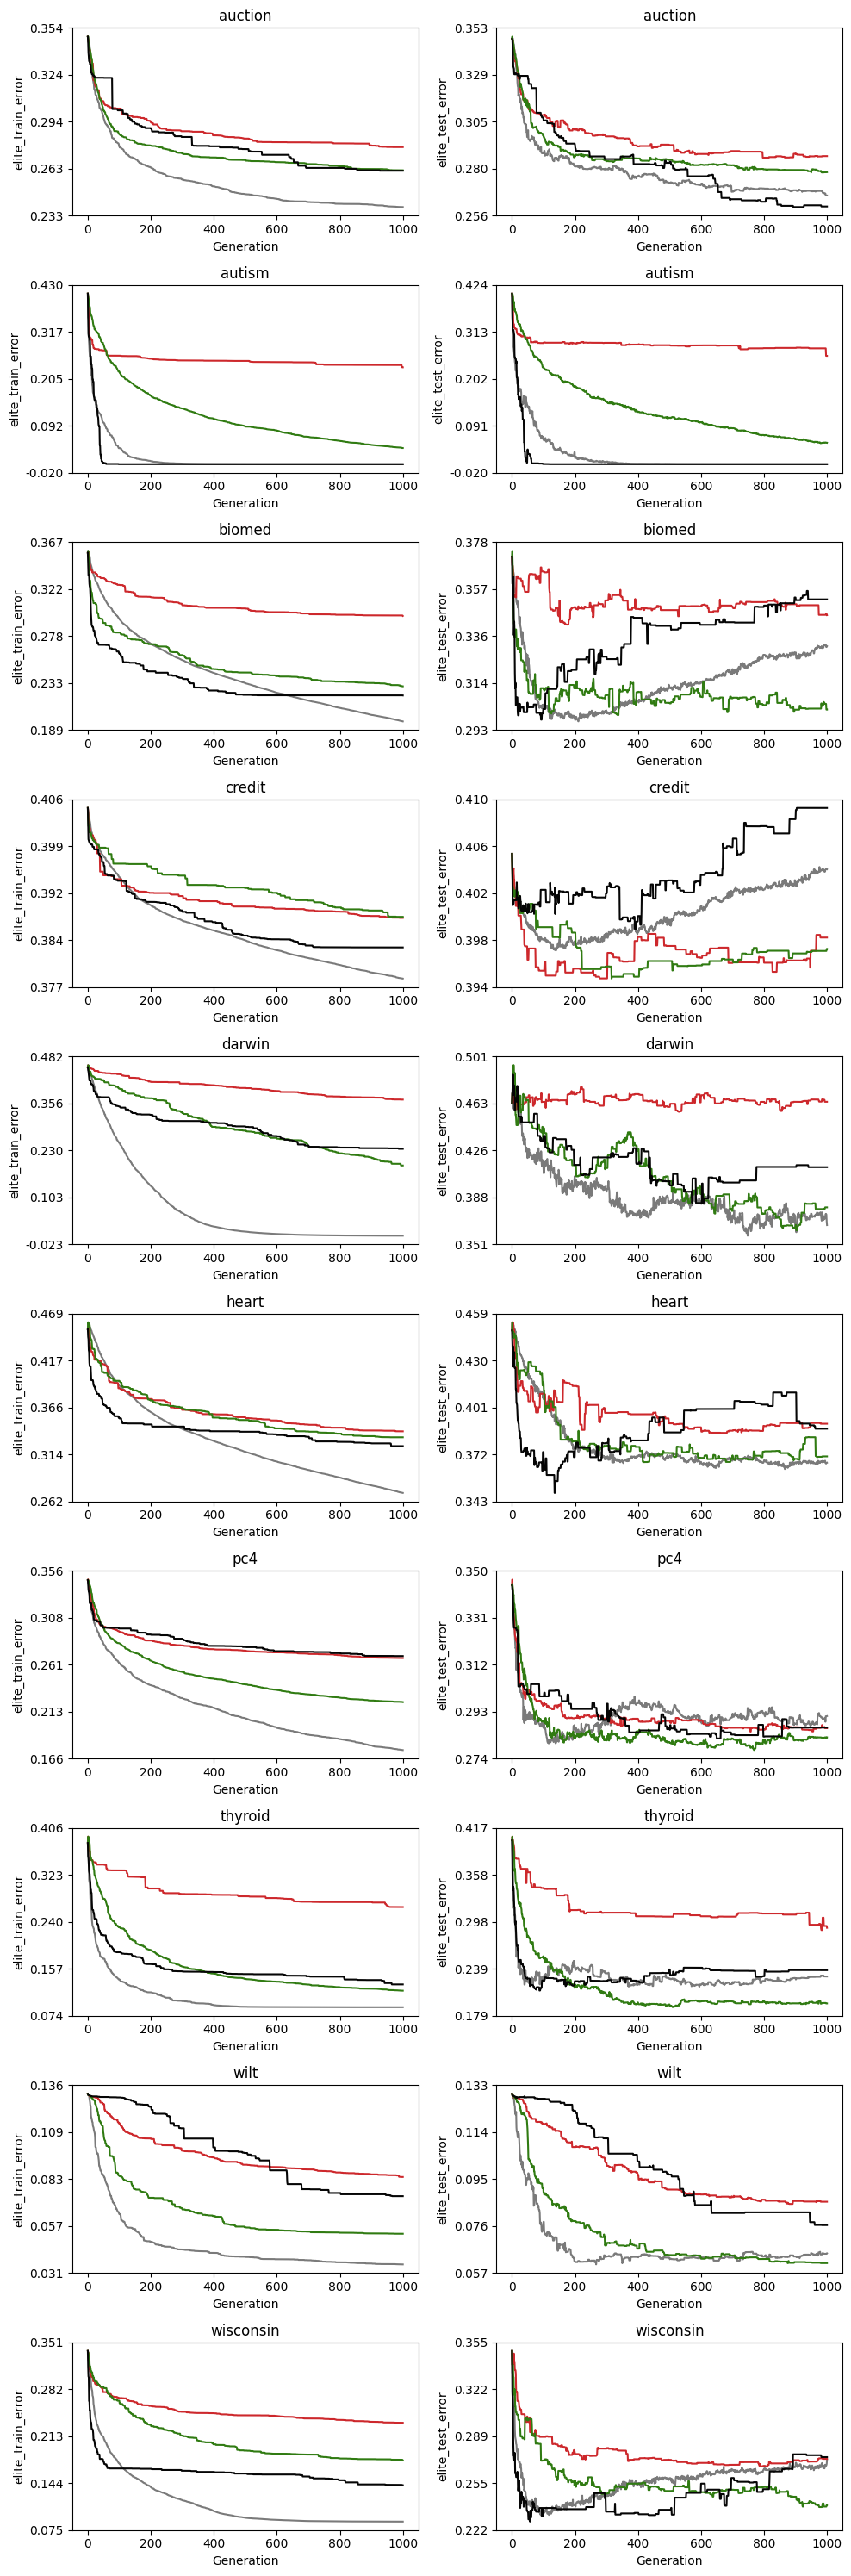

In [46]:
error_evolution_plot(ana.logs)

Median Test Error of the Final Individual

In [30]:
get_aggregated_performance(ana.results, metric='nodes_count', agg='median')

config_settings,GP_,GSGP_,SLIM*SIG1_,SLIM+SIG1_
dataset_name,,,,
auction,864.0,3016.0,251.0,660.0
autism,174.0,4177.0,205.0,1609.5
biomed,328.0,5524.0,290.0,323.0
credit,345.0,5360.0,159.0,109.0
darwin,82.0,5204.0,344.0,360.5
heart,874.0,5517.0,288.5,289.0
pc4,280.0,4342.0,613.5,1959.0
thyroid,268.0,3589.0,207.0,1006.0
wilt,411.0,1948.0,954.5,370.0


In [31]:
get_aggregated_performance(ana.results, metric='test.rmse', agg='median')

config_settings,GP_,GSGP_,SLIM*SIG1_,SLIM+SIG1_
dataset_name,,,,
auction,0.260853,0.266533,0.286973,0.278627
autism,0.000000,0.000001,0.256315,0.050817
biomed,0.352106,0.330951,0.344969,0.302248
credit,0.409470,0.404261,0.398467,0.397508
darwin,0.412195,0.365864,0.464452,0.380084
heart,0.388103,0.367135,0.391185,0.371006
pc4,0.286836,0.291476,0.286586,0.282900
thyroid,0.236933,0.228957,0.290628,0.194820
wilt,0.076692,0.065258,0.086168,0.061304


P-Values of the Wilcoxon Test comparing the Test Error of the Final Individual

'+': Smaller Test Error at 5% significance level

'-': Larger Test Error at 5% significance level

'&approx;': No significant difference

In [45]:
get_slim_performance_difference_significance_table(ana.results, 'test.rmse')

KeyError: 'SLIM*SIG2_'

Visualization of the Tree Size Evolution


<span style="color:#050505;">&#9632; GP</span>
<span style="color:#7a7a7a;">&#9632; GSGP</span>
<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

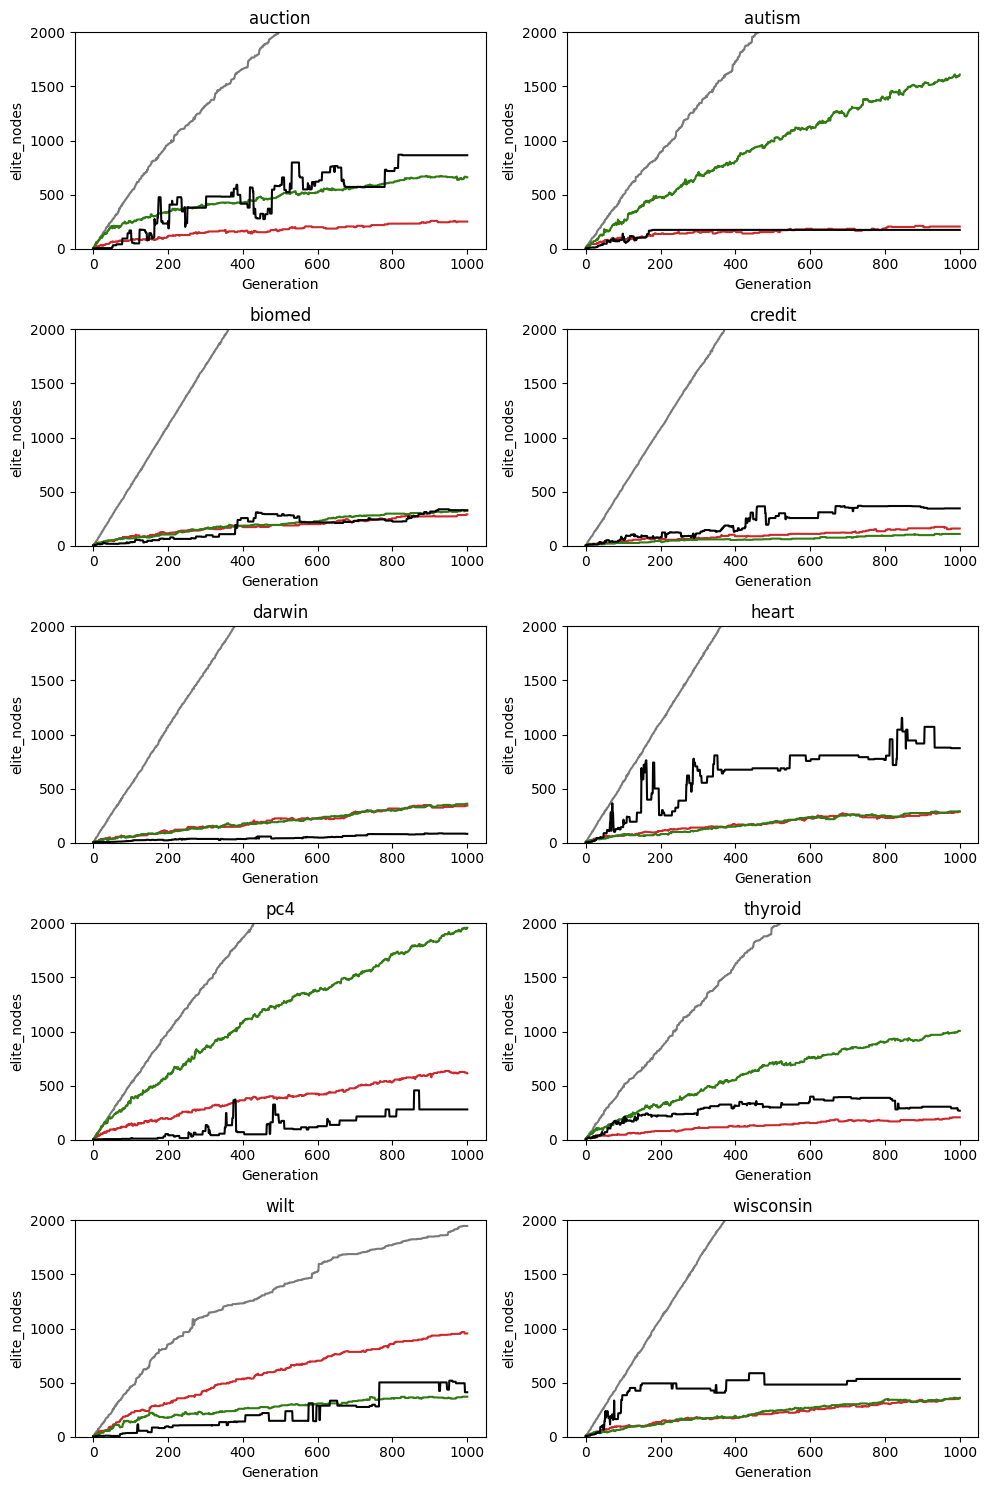

In [47]:
tree_size_evolution_plot(ana.logs)

In [50]:
import numpy as np
wtl = []
for dataset in ana.results['dataset_name'].unique():
    subset = ana.results[ana.results['dataset_name'] == dataset]
    
    for config_id in subset['config_id'].unique():       
        
        
        for metric in ['test.accuracy', 'test.f1_score', 'test.roc_auc']:
            wins = 0
            ties = 0
            losses = 0
            for config_id2 in list( set(subset['config_id'].unique()) - set([config_id])):
                print()
                print(config_id, config_id2, metric)
                
                performance1 = subset[subset['config_id'] == config_id][metric].values
                performance2 = subset[subset['config_id'] == config_id2][metric].values
                print(len(performance1), len(performance2), type(performance1), type(performance2))
                
                if np.all(performance1 == performance2):
                    p_value = 1.0
                
                else:
                    p_value = stats.wilcoxon(performance1, performance2).pvalue

                if p_value >= 0.05:
                    ties += 1
                    
                else:
                    if np.median(performance1) > np.median(performance2):
                        wins += 1
                    else:
                        losses += 1
            wtl.append([dataset, config_id, metric, wins, ties, losses])
                    
wtl_df = pd.DataFrame(wtl, columns=['dataset_name', 'config_id', 'metric', 'wins', 'ties', 'losses'])       

wtl_df = pd.merge(wtl_df, ana.results[['dataset_name', 'config_id', 'name']].drop_duplicates().reset_index(), 
                  on=['dataset_name', 'config_id'], how='left')

wtl_fin = wtl_df.groupby(['name', 'metric'])[['wins', 'ties', 'losses']].sum().reset_index()
wtl_fin['evaluation'] = wtl_fin['wins'] + 0.5* wtl_fin['ties'] 
wtl_fin
# Combine wins, ties, and losses into a single column
wtl_fin['result'] = wtl_fin.apply(lambda row: f"{row['wins']}/{row['ties']}/{row['losses']}", axis=1)

# Drop the individual columns for wins, ties, and losses
df_combined = wtl_fin.drop(columns=['wins', 'ties', 'losses'])

# Pivot the table to have the fitness function as index and metrics as columns
df_pivot = df_combined.pivot(index='name', columns='metric', values='result')

# Optional: Reset index if you want the fitness function as a regular column
df_pivot.reset_index(inplace=True)

df_pivot.set_index('name', inplace=True)
df_pivot

        


3 49 test.accuracy
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

3 43 test.accuracy
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

3 28 test.accuracy
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

3 49 test.f1_score
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

3 43 test.f1_score
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

3 28 test.f1_score
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

3 49 test.roc_auc
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

3 43 test.roc_auc
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

3 28 test.roc_auc
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

28 3 test.accuracy
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

28 49 test.accuracy
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

28 43 test.accuracy
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

28 3 test.f1_score
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

28 49 test.f1_score
8 8 <class 'numpy.ndarray'> <class 'numpy.nd

metric,test.accuracy,test.f1_score,test.roc_auc
name,,,
GP,10/17/3,8/17/5,2/25/3
GSGP,10/19/1,11/18/1,8/22/0
SLIM*SIG1,0/6/24,0/10/20,1/17/12
SLIM+SIG1,9/19/2,9/19/2,6/22/2


In [51]:
import numpy as np
wtl = []
for dataset in ana.results['dataset_name'].unique():
    subset = ana.results[ana.results['dataset_name'] == dataset]
    
    for config_id in subset['config_id'].unique():       
        
        
        for metric in ['test.rmse', 'nodes_count']:
            wins = 0
            ties = 0
            losses = 0
            for config_id2 in list( set(subset['config_id'].unique()) - set([config_id])):
                print()
                print(config_id, config_id2, metric)
                
                performance1 = subset[subset['config_id'] == config_id][metric].values
                performance2 = subset[subset['config_id'] == config_id2][metric].values
                print(len(performance1), len(performance2), type(performance1), type(performance2))
                
                if np.all(performance1 == performance2):
                    p_value = 1.0
                
                else:
                    p_value = stats.wilcoxon(performance1, performance2).pvalue

                if p_value >= 0.05:
                    ties += 1
                    
                else:
                    if np.median(performance1) > np.median(performance2):
                        #wins += 1
                        losses += 1
                    else:
                        #losses += 1
                        wins += 1
            wtl.append([dataset, config_id, metric, wins, ties, losses])
                    
wtl_df = pd.DataFrame(wtl, columns=['dataset_name', 'config_id', 'metric', 'wins', 'ties', 'losses'])       

wtl_df = pd.merge(wtl_df, ana.results[['dataset_name', 'config_id', 'name']].drop_duplicates().reset_index(), 
                  on=['dataset_name', 'config_id'], how='left')

wtl_fin = wtl_df.groupby(['name', 'metric'])[['wins', 'ties', 'losses']].sum().reset_index()
wtl_fin['evaluation'] = wtl_fin['wins'] + 0.5* wtl_fin['ties'] 
wtl_fin
# Combine wins, ties, and losses into a single column
wtl_fin['result'] = wtl_fin.apply(lambda row: f"{row['wins']}/{row['ties']}/{row['losses']}", axis=1)

# Drop the individual columns for wins, ties, and losses
df_combined = wtl_fin.drop(columns=['wins', 'ties', 'losses'])

# Pivot the table to have the fitness function as index and metrics as columns
df_pivot = df_combined.pivot(index='name', columns='metric', values='result')

# Optional: Reset index if you want the fitness function as a regular column
df_pivot.reset_index(inplace=True)

df_pivot.set_index('name', inplace=True)
df_pivot

        


3 49 test.rmse
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

3 43 test.rmse
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

3 28 test.rmse
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

3 49 nodes_count
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

3 43 nodes_count
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

3 28 nodes_count
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

28 3 test.rmse
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

28 49 test.rmse
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

28 43 test.rmse
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

28 3 nodes_count
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

28 49 nodes_count
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

28 43 nodes_count
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

43 49 test.rmse
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

43 3 test.rmse
8 8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>

43 28 test.rmse
8 8 <class 'nu

metric,nodes_count,test.rmse
name,,
GP,14/10/6,6/19/5
GSGP,0/0/30,7/20/3
SLIM*SIG1,18/10/2,0/16/14
SLIM+SIG1,13/10/7,13/13/4


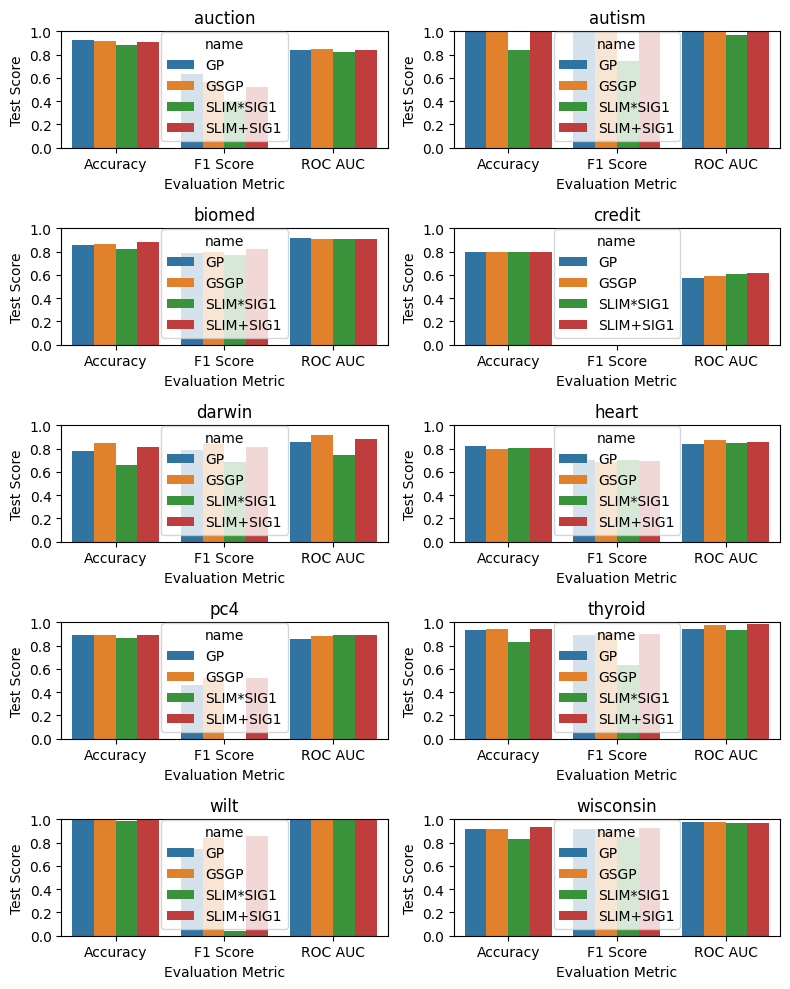

In [56]:

best_median = ana.results.groupby(['dataset_name', 'name'])[['test.rmse', 'test.accuracy', 'test.f1_score', 'test.roc_auc']].median().reset_index()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Melt the DataFrame to long format
df_long = best_median.melt(
    id_vars=['dataset_name', 'name'],
    value_vars=[ 'test.accuracy', 'test.f1_score', 'test.roc_auc'],
    var_name='metric',
    value_name='value'
)

datasets = df_long['dataset_name'].unique()
df_long['metric'].replace({'test.accuracy': 'Accuracy',
                        'test.f1_score': 'F1 Score',
                        'test.roc_auc': 'ROC AUC'}, inplace=True)
# df_long['name'].replace({'sigmoid_rmse': 'RMSE',
#                                      'weighted_sigmoid_rmse': 'WRMSE',
#                                     'accuracy': 'Accuracy',
#                                     'f1_score': 'F1 Score'}, inplace=True)
# Layout: 2 plots per row
n_cols = 2
n_rows = math.ceil(len(datasets) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 2 * n_rows), squeeze=False)

# Plot each dataset
for idx, dataset in enumerate(datasets):
    i, j = divmod(idx, n_cols)
    ax = axes[i, j]
    
    subset = df_long[df_long['dataset_name'] == dataset]
    
    sns.barplot(
        data=subset,
        x='metric',
        y='value',
        hue='name',
        ax=ax
    )
    
    ax.set_title(dataset)
    ax.set_xlabel("Evaluation Metric")
    ax.set_ylabel("Test Score")
    ax.tick_params(axis='x')
    #ax.legend_.remove()
    ax.set_ylim(0, 1)
    ax.set_yticks(np.arange(0, 1.1, 0.2))
for k in range(len(datasets), n_rows * n_cols):
    i, j = divmod(k, n_cols)
    fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()


Median Tree Size of the final Individual 

In [33]:
get_aggregated_performance(ana.results, metric='nodes_count', agg='median')

config_settings,GP_,GSGP_,SLIM*SIG1_,SLIM+SIG1_
dataset_name,,,,
auction,864.0,3016.0,251.0,660.0
autism,174.0,4177.0,205.0,1609.5
biomed,328.0,5524.0,290.0,323.0
credit,345.0,5360.0,159.0,109.0
darwin,82.0,5204.0,344.0,360.5
heart,874.0,5517.0,288.5,289.0
pc4,280.0,4342.0,613.5,1959.0
thyroid,268.0,3589.0,207.0,1006.0
wilt,411.0,1948.0,954.5,370.0


In [34]:
get_aggregated_performance(ana.results, metric='test.rmse', agg='median')

config_settings,GP_,GSGP_,SLIM*SIG1_,SLIM+SIG1_
dataset_name,,,,
auction,0.260853,0.266533,0.286973,0.278627
autism,0.000000,0.000001,0.256315,0.050817
biomed,0.352106,0.330951,0.344969,0.302248
credit,0.409470,0.404261,0.398467,0.397508
darwin,0.412195,0.365864,0.464452,0.380084
heart,0.388103,0.367135,0.391185,0.371006
pc4,0.286836,0.291476,0.286586,0.282900
thyroid,0.236933,0.228957,0.290628,0.194820
wilt,0.076692,0.065258,0.086168,0.061304


P-Values of the Wilcoxon Test comparing the Tree Size of the Final Individual

'+': Smaller Tree Size at 5% significance level

'-': Larger Tree Size at 5% significance level

'&approx;': No significant difference

In [ ]:
get_slim_performance_difference_significance_table(ana.results, metric = 'nodes_count')

KeyError: 'SLIM*SIG1_'

Plot for Comparison of the Average Rank accross Datasets regarding different Evaluation Metrics

<span style="color:#050505;">&#9632; GP</span>
<span style="color:#7a7a7a;">&#9632; GSGP</span>
<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

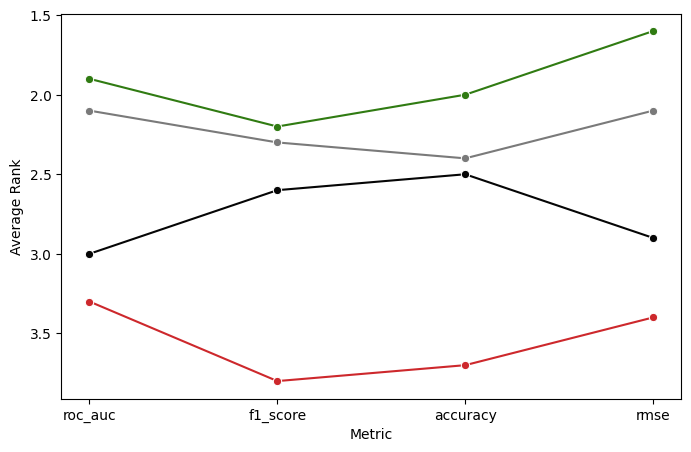

In [35]:
plot_avg_ranking_multimetrix(ana.results)

Friedman Test results

In [ ]:
get_multimetric_ranking_significance(ana.results)

P-Value of the Friedman Test for ranks regarding Accuracy: 0.00180
P-Value of the Friedman Test for ranks regarding F1-Score: 0.00002
P-Value of the Friedman Test for ranks regarding ROC-AUC: 0.05276
P-Value of the Friedman Test for ranks regarding RMSE: 0.34711
